In [37]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import tree

In [60]:
virgin=pd.read_csv(r'C:virgin.csv')
virgin

,gender,sexuallity,age,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,attempt_suicide
0,1,0,35,0,1,0,0,0.0,1,1,1
1,1,1,21,1,1,0,0,0.0,1,1,0
2,1,0,22,2,1,0,0,10.0,1,1,0
3,1,0,19,2,1,1,0,8.0,1,1,0
4,1,0,23,2,0,0,1,10.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
464,0,0,26,2,1,0,0,10.0,1,0,0
465,1,0,31,0,0,0,0,10.0,0,0,0
466,0,0,17,0,1,0,0,20.0,1,1,1
467,1,0,18,3,1,0,0,16.0,1,1,0


In [61]:
X=virgin.drop(columns=['virgin'])
y=virgin['virgin']

In [62]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.2,random_state=42)

In [63]:
clf=DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_split=2,
    random_state=42
)

In [64]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [65]:
y_pred=clf.predict(X_test)

[Text(0.5416666666666666, 0.875, 'x[2] <= 27.5\ngini = 0.418\nsamples = 94\nvalue = [28, 66]'),
 Text(0.3333333333333333, 0.625, 'x[6] <= 12.5\ngini = 0.33\nsamples = 72\nvalue = [15, 57]'),
 Text(0.16666666666666666, 0.375, 'x[8] <= 0.5\ngini = 0.264\nsamples = 64\nvalue = [10, 54]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.408\nsamples = 28\nvalue = [8, 20]'),
 Text(0.25, 0.125, 'gini = 0.105\nsamples = 36\nvalue = [2, 34]'),
 Text(0.5, 0.375, 'x[2] <= 18.0\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(0.75, 0.625, 'x[0] <= 0.5\ngini = 0.483\nsamples = 22\nvalue = [13, 9]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8333333333333334, 0.375, 'x[8] <= 0.5\ngini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(0.75, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.9166666

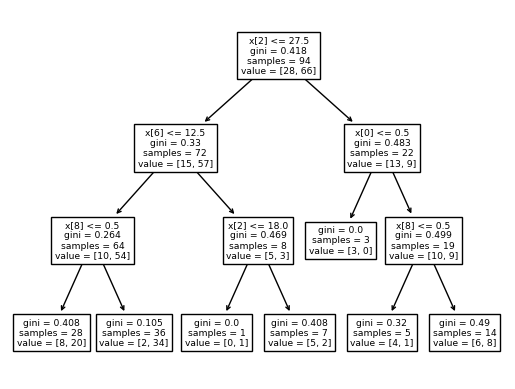

In [66]:
tree.plot_tree(clf)

In [67]:
print('Accuracy score', accuracy_score(y_test,y_pred))
print('Confusion matrix', classification_report(y_test, y_pred))

Accuracy score 0.72
Confusion matrix               precision    recall  f1-score   support

           0       0.37      0.25      0.30        89
           1       0.79      0.87      0.83       286

    accuracy                           0.72       375
   macro avg       0.58      0.56      0.56       375
weighted avg       0.69      0.72      0.70       375



In [68]:
importances= clf.feature_importances_
pd.DataFrame({
    "features":X.columns,
    'importance':importances
}).sort_values("importance", ascending=False)

,features,importance
2,age,0.455181
6,friends,0.244169
8,depressed,0.209805
0,gender,0.090845
1,sexuallity,0.000000
3,bodyweight,0.000000
4,prostitution_legal,0.000000
5,pay_for_sex,0.000000
7,social_fear,0.000000
9,attempt_suicide,0.000000


In [53]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 10, 20],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
